<a href="https://colab.research.google.com/github/indahsilvi393-lang/Prediksi-Biaya-Asuransi/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Banyak faktor yang memengaruhi biaya premi asuransi kesehatan yang Anda bayarkan berada di luar kendali Anda. Namun, penting untuk memahami apa saja faktor-faktor tersebut. Berikut adalah beberapa faktor yang memengaruhi biaya premi asuransi kesehatan:

- Usia (age): Usia penerima manfaat utama.
- Jenis kelamin (sex) : Jenis kelamin pemegang polis asuransi, bisa perempuan atau laki-laki.
- BMI (bmi): Indeks massa tubuh, memberikan pemahaman tentang berat badan yang relatif tinggi atau rendah dibandingkan tinggi badan. Ini merupakan indeks obyektif dari berat badan (kg/m²) dengan menggunakan rasio tinggi terhadap berat badan. Idealnya berkisar antara 18,5 hingga 24,9.
- Jumlah anak (children): Jumlah anak yang ditanggung oleh asuransi kesehatan / jumlah tanggungan.
- Perokok (smoker): Kebiasaan merokok.
- Wilayah tempat tinggal (region): Area tempat tinggal penerima manfaat di AS, seperti timur laut (northeast), tenggara (southeast), barat daya (southwest), dan barat laut (northwest).

<font size=5><p style="color:purple"> EDA and Visualizations

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [5]:
df = pd.read_csv('/content/drive/MyDrive/MATKUL/MPSD_7/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
for feature in ['sex', 'children', 'smoker', 'region']:
    display(df[feature].value_counts().sort_index().to_frame())

,count
sex,
female,662
male,676


,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


,count
smoker,
no,1064
yes,274


,count
region,
northeast,324
northwest,325
southeast,364
southwest,325


a. Analisis biaya medis berdasarkan region, charges, sex, smoker, childern

In [9]:
# Menghitung total charges berdasarkan region
charges = df.groupby('region')['charges'].sum().reset_index().sort_values(by='charges', ascending=True)
# Membuat bar chart interaktif dengan Plotly
fig = px.bar(
    charges,
    x='charges',
    y='region',
    orientation='h',
    title='Total Charges by Region',
    labels={'charges': 'Total Charges', 'region': 'Region'},
    color='charges',
    color_continuous_scale='Reds'
)
# Menyesuaikan tata letak
fig.update_layout(
    xaxis_title='Total Charges',
    yaxis_title='Region',
    yaxis=dict(title_standoff=10),
    title=dict(x=0.5, xanchor='center'),
)
# Menampilkan grafik
fig.show()


Insight:
- Wilayah Southeast memiliki total charges tertinggi dibandingkan dengan wilayah lain, dengan nilai 5.3 juta. Hal ini menunjukkan bahwa pelanggan di wilayah Southeast secara kolektif mengeluarkan biaya lebih besar dibandingkan wilayah lain.
- Wilayah Northeast berada di urutan kedua, dengan total charges lebih rendah dari Southeast tetapi masih signifikan, sekitar 4.3 juta.
- Wilayah Northwest dan Southwest memiliki total charges yang hampir setara, dengan nilai lebih rendah dibanding Northeast dan Southeast, sekitar 4.0 juta.

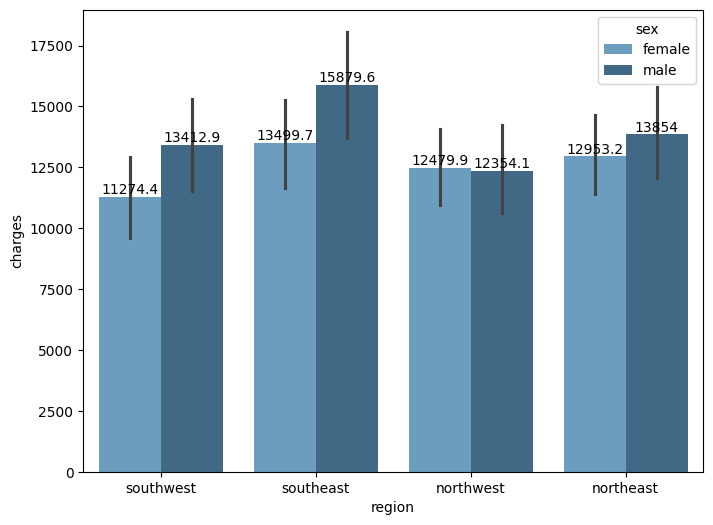

In [10]:
# Membuat barplot
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Blues_d')
# Menambahkan label nilai di setiap batang
for container in ax.containers:
    ax.bar_label(container)
# Menampilkan plot
plt.show()


Insight:

- Wilayah Southeast memiliki biaya tertinggi dibandingkan wilayah lain untuk kedua jenis kelamin (female dan male). Sementara
Wilayah Southwest memiliki biaya terendah untuk kedua jenis kelamin.
- Di semua wilayah, perbedaan antara jenis kelamin (female vs male) tidak terlalu signifikan. Namun, pada beberapa wilayah seperti Northeast, laki-laki memiliki rata-rata biaya yang sedikit lebih tinggi dibandingkan perempuan.
- Error bar (garis vertikal di atas batang) menunjukkan tingkat variasi atau deviasi standar dalam biaya di masing-masing kategori. Error bar yang lebih panjang di Southeast menunjukkan bahwa variasi biaya di wilayah ini cukup besar, terutama untuk laki-laki.
- Biaya yang lebih tinggi di Southeast mungkin disebabkan oleh faktor-faktor seperti gaya hidup, kondisi kesehatan, atau tingkat premi yang lebih tinggi. Southwest dengan biaya yang lebih rendah dapat mencerminkan pelanggan dengan profil risiko yang lebih rendah atau kondisi ekonomi yang berbeda.

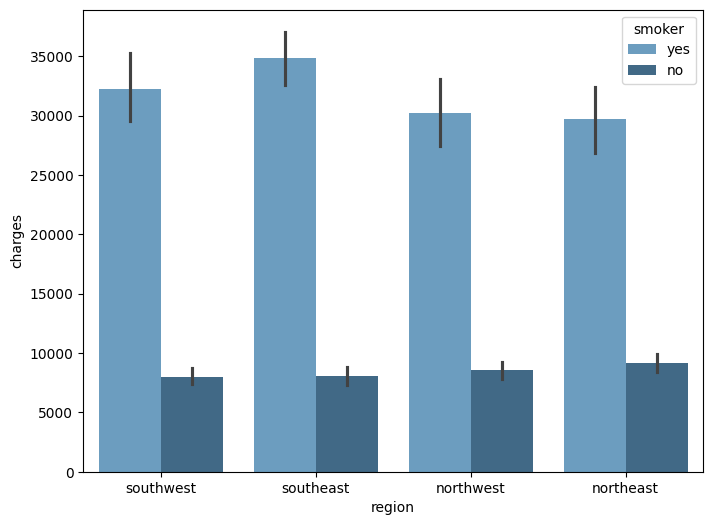

In [11]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Blues_d')

Insigh:
- Biaya rata-rata jauh lebih tinggi untuk perokok dibandingkan bukan perokok di semua wilayah. Hal ini menunjukkan bahwa status merokok memiliki dampak signifikan pada biaya (kemungkinan terkait dengan biaya kesehatan).
- Orang di wilayah Barat Daya (Southwest) memiliki kebiasaan merokok yang lebih tinggi dibandingkan dengan orang di wilayah Timur Laut (Northeast). Namun, meskipun kebiasaan merokok lebih tinggi di Southwest, biaya medis berdasarkan jenis kelamin lebih tinggi di wilayah Timur Laut (Northeast) dibandingkan dengan Southwest dan Barat Laut (Northwest) secara keseluruhan.

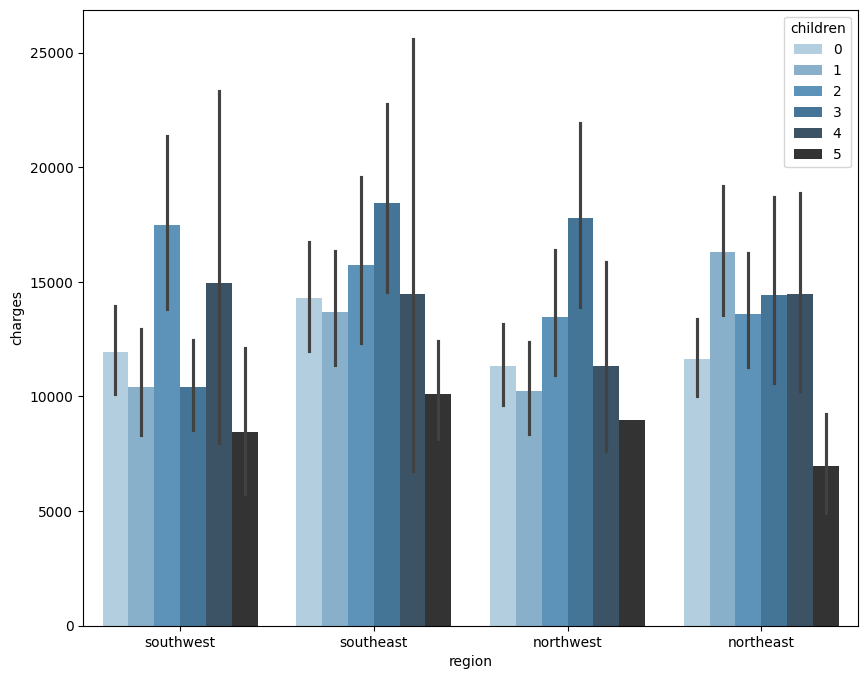

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Blues_d')

Insight:
- Secara umum, biaya (charges) cenderung meningkat seiring bertambahnya jumlah anak. Orang dengan 4 atau 5 anak (warna lebih gelap) memiliki biaya yang lebih tinggi dibandingkan dengan orang tanpa anak (warna paling terang).
- Wilayah Southeast memiliki biaya tertinggi di hampir semua kategori jumlah anak, menunjukkan bahwa wilayah ini mungkin memiliki tingkat biaya medis atau asuransi yang lebih tinggi. Wilayah Southwest dan Northwest memiliki biaya yang lebih rendah dibandingkan wilayah lain, terutama untuk kategori tanpa anak (0 anak).

b. Analisis biaya medis berdasarkan usia, BMI, dan jumlah anak sesuai dengan faktor merokok

In [13]:
# Visualisasi interaktif hubungan antara 'age' dan 'charges'
fig1 = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    trendline='ols',  # Menambahkan garis hubungan linear
    title='Age vs Charges by Smoking Status',
    labels={'age': 'Age', 'charges': 'Medical Charges'}
)
fig1.show()

# Visualisasi interaktif hubungan antara 'bmi' dan 'charges'
fig2 = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    trendline='ols',  # Menambahkan garis hubungan linear
    title='BMI vs Charges by Smoking Status',
    labels={'bmi': 'BMI', 'charges': 'Medical Charges'}
)
fig2.show()

# Visualisasi interaktif hubungan antara 'children' dan 'charges'
fig3 = px.scatter(
    df,
    x='children',
    y='charges',
    color='smoker',
    trendline='ols',  # Menambahkan garis hubungan linear
    title='Children vs Charges by Smoking Status',
    labels={'children': 'Number of Children', 'charges': 'Medical Charges'}
)
fig3.show()


Insight:
- Merokok adalah faktor yang paling signifikan dalam meningkatkan biaya medis dibandingkan dengan faktor lainnya seperti usia, BMI, atau jumlah anak. Meski begitu, biaya medis tetap meningkat seiring bertambahnya usia, kenaikan BMI, dan jumlah anak.
- Orang dengan anak cenderung merokok lebih jarang dibandingkan dengan orang tanpa anak. Hal ini bisa berkaitan dengan tanggung jawab tambahan yang membuat mereka lebih sadar akan risiko kesehatan atau gaya hidup yang lebih sehat.


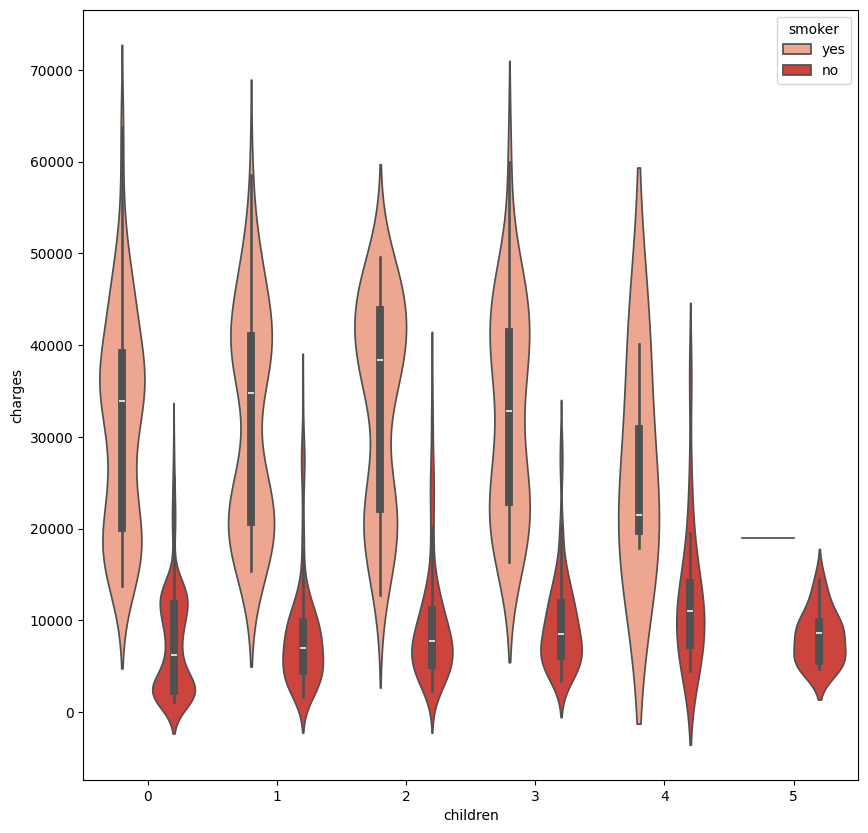

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='Reds')

Insight:
- Violin plot yang digunakan untuk menunjukkan distribusi data. Plot tersebut menggambarkan hubungan antara jumlah anak dan kebiasaan merokok, dengan distribusi yang menunjukkan bahwa orang dengan lebih banyak anak lebih jarang menjadi perokok.

In [15]:
#Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [16]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


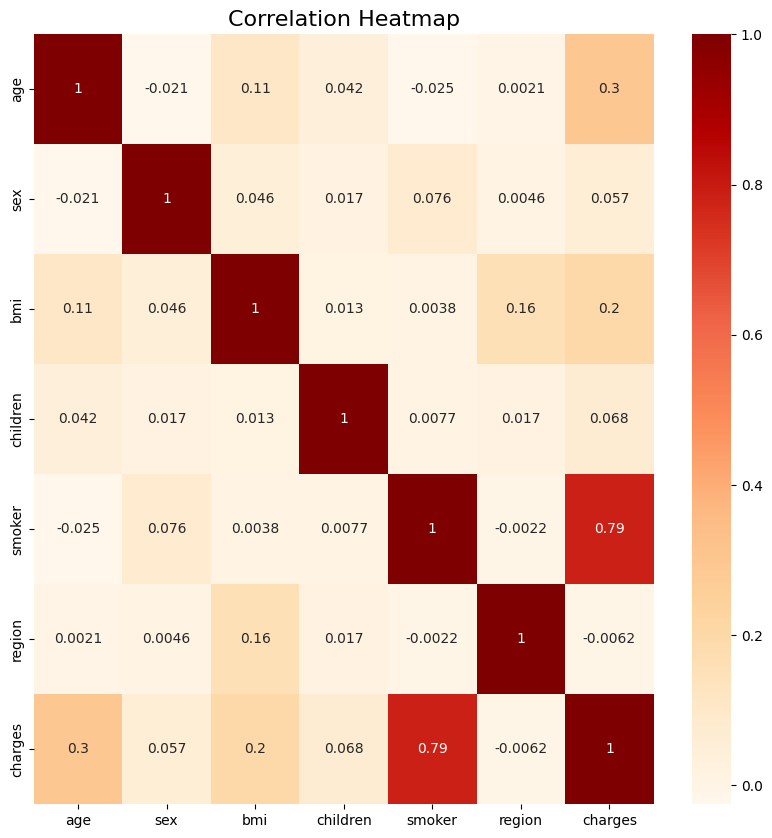

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Membuat heatmap dengan warna baru
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='OrRd')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Insight:
- Korelasi antara age dan charges adalah 0.3 (korelasi positif kuat)
- Korelasi antara smoker dan charges adalah 0.79 (korelasi positif kuat)
- Korelasi antara children dan charges adalah 0.068 (korelasi positif lemah)
- Korelasi antara sex dan charges adalah 0.057 (korelasi positif lemah)


In [19]:
X = df.drop(columns=['charges'])
y = df['charges']

=================================== Linear Regression Regressor ====================================
Training Metrics:
Train MAE: 0.7872, Train MSE: 0.9775, Train RMSE: 0.9887, Train R2: 0.9134
Testing Metrics:
Test MAE: 0.8398, Test MSE: 1.0524, Test RMSE: 1.0259, Test R2: 0.8944
Training Time: 0.02 seconds



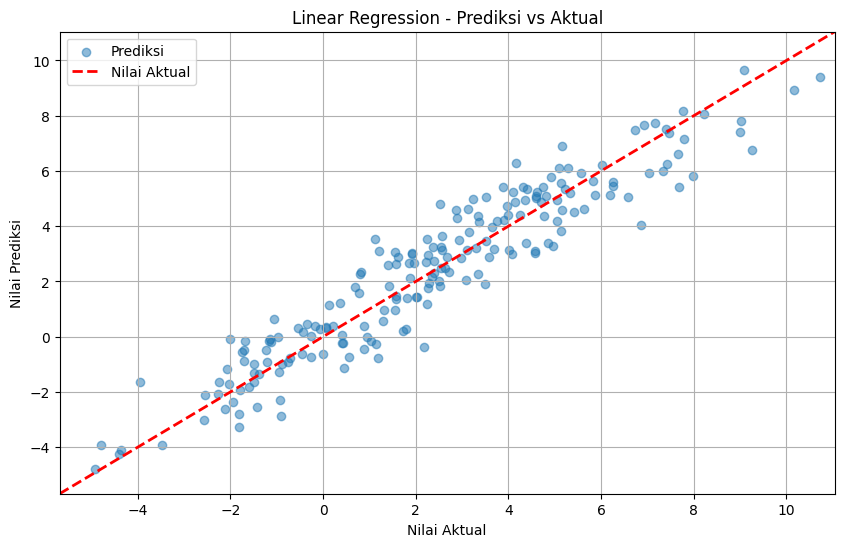

========================================= Ridge Regressor ==========================================
Training Metrics:
Train MAE: 0.7878, Train MSE: 0.9800, Train RMSE: 0.9899, Train R2: 0.9132
Testing Metrics:
Test MAE: 0.8366, Test MSE: 1.0499, Test RMSE: 1.0246, Test R2: 0.8946
Training Time: 0.01 seconds



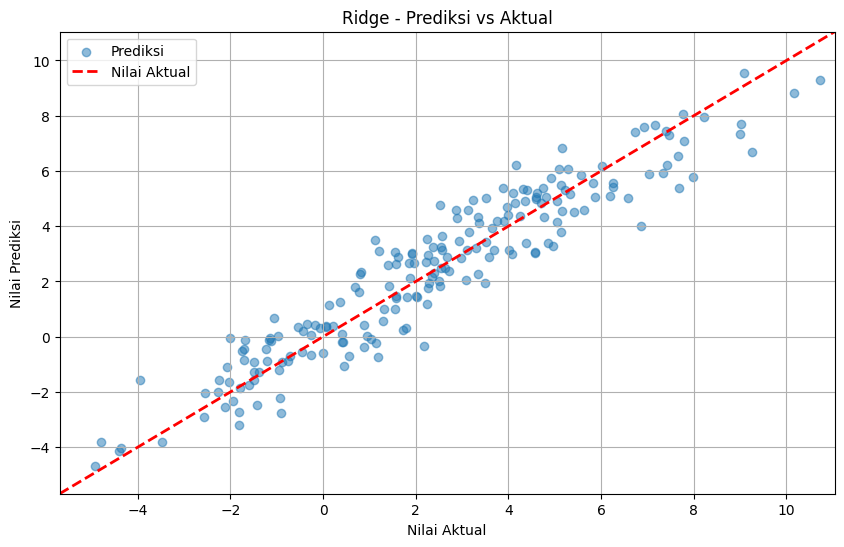

========================================= Lasso Regressor ==========================================
Training Metrics:
Train MAE: 0.8927, Train MSE: 1.2252, Train RMSE: 1.1069, Train R2: 0.8915
Testing Metrics:
Test MAE: 0.8812, Test MSE: 1.2309, Test RMSE: 1.1095, Test R2: 0.8765
Training Time: 0.00 seconds



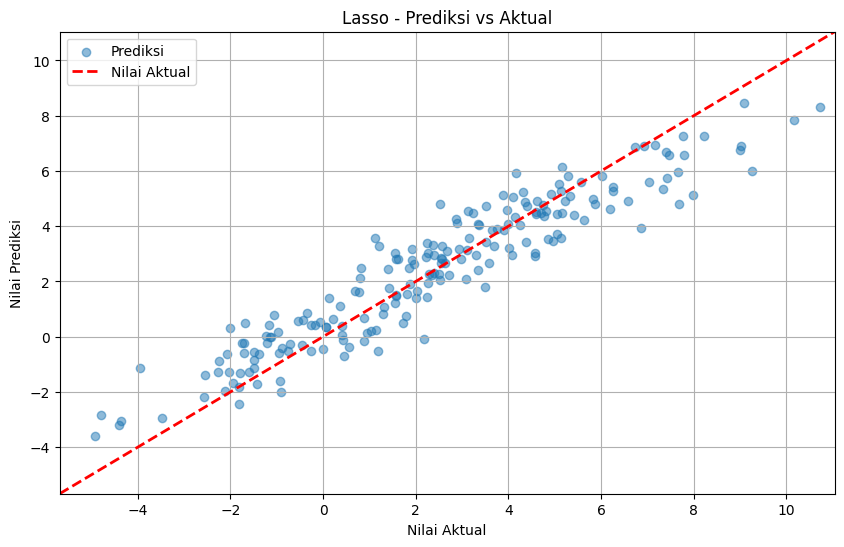

======================================== XGBoost Regressor =========================================
Training Metrics:
Train MAE: 0.0392, Train MSE: 0.0031, Train RMSE: 0.0558, Train R2: 0.9997
Testing Metrics:
Test MAE: 0.9861, Test MSE: 1.5294, Test RMSE: 1.2367, Test R2: 0.8465
Training Time: 0.19 seconds



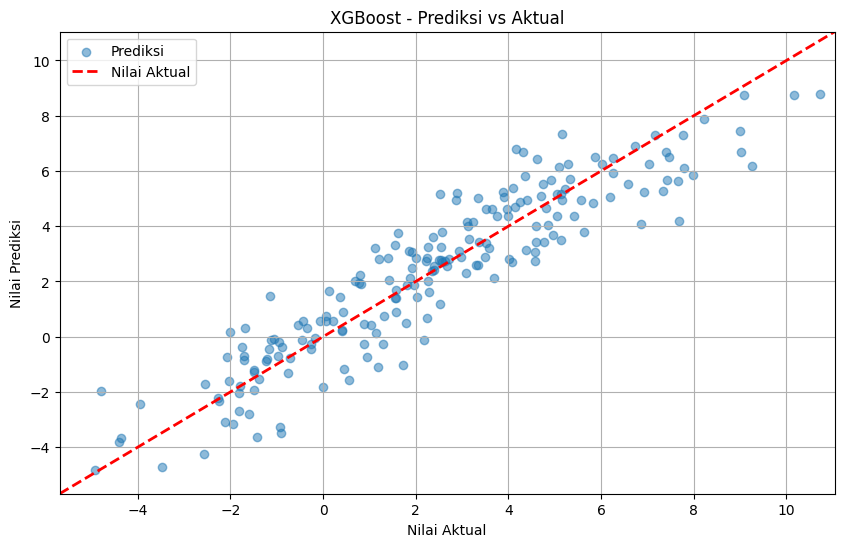

Overall Results:


,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Training Time (seconds)
0,Linear Regression,0.787188,0.839831,0.977548,1.052403,0.988710,1.025867,0.913443,0.894387,0.015742
1,Ridge,0.787840,0.836646,0.979962,1.049878,0.989930,1.024636,0.913229,0.894641,0.007496
2,Lasso,0.892664,0.881224,1.225243,1.230933,1.106907,1.109474,0.891511,0.876471,0.002201
3,XGBoost,0.039163,0.986092,0.003113,1.529381,0.055790,1.236681,0.999724,0.846521,0.194125


In [20]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import warnings
from IPython.display import display

warnings.filterwarnings("ignore")  # Mengabaikan warning untuk tampilan yang lebih rapi

# Contoh data (gantikan ini dengan data Anda)
# Dataset simulasi
np.random.seed(0)
x = np.random.rand(1000, 5)
y = x[:, 0] * 10 + x[:, 1] * -5 + np.random.randn(1000)

# Split data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Definisi model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'XGBoost': XGBRegressor(random_state=42)
}

# Fungsi pelatihan dan evaluasi
def model_training(X_train, X_test, y_train, y_test, models):
    # Menyimpan hasil evaluasi
    evaluation_results = []

    # Looping melalui semua model
    for model_name, model in models.items():
        start_time = time.time()  # Mulai pencatatan waktu

        # Melatih model
        model.fit(X_train, y_train)
        training_time = time.time() - start_time  # Hitung waktu pelatihan

        # Prediksi pada data testing
        y_pred = model.predict(X_test)

        # Hitung metrik evaluasi
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Prediksi pada data training untuk evaluasi training
        y_train_pred = model.predict(X_train)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)

        # Cetak hasil evaluasi
        print('='*100)
        print(f' {model_name} Regressor '.center(100, '='))
        print('='*100)
        print('Training Metrics:')
        print(f"Train MAE: {train_mae:.4f}, Train MSE: {train_mse:.4f}, Train RMSE: {train_rmse:.4f}, Train R2: {train_r2:.4f}")
        print('Testing Metrics:')
        print(f"Test MAE: {mae:.4f}, Test MSE: {mse:.4f}, Test RMSE: {rmse:.4f}, Test R2: {r2:.4f}")
        print(f"Training Time: {training_time:.2f} seconds\n")

        # Simpan hasil evaluasi ke dalam list
        evaluation_results.append({
            'Model': model_name,
            'Train MAE': train_mae,
            'Test MAE': mae,
            'Train MSE': train_mse,
            'Test MSE': mse,
            'Train RMSE': train_rmse,
            'Test RMSE': rmse,
            'Train R2': train_r2,
            'Test R2': r2,
            'Training Time (seconds)': training_time
        })

        # Visualisasi hasil prediksi vs nilai aktual
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5, label='Prediksi')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Nilai Aktual')  # Garis referensi
        plt.title(f'{model_name} - Prediksi vs Aktual')
        plt.xlabel('Nilai Aktual')
        plt.ylabel('Nilai Prediksi')
        plt.xlim([y.min(), y.max()])
        plt.ylim([y.min(), y.max()])
        plt.grid(True)
        plt.legend()
        plt.show()

    # Tampilkan hasil evaluasi sebagai tabel
    results_df = pd.DataFrame(evaluation_results)
    print('Overall Results:')
    display(results_df)  # Gunakan display jika di Jupyter Notebook
    return results_df

# Panggil fungsi untuk melatih dan mengevaluasi model
results = model_training(x_train, x_test, y_train, y_test, models)


In [21]:
# Menentukan model terbaik berdasarkan RMSE pada data testing
best_model_rmse = results.loc[results['Test RMSE'].idxmin()]

# Cetak model terbaik
print('='*50)
print(' Best Model Based on Test RMSE '.center(50, '='))
print('='*50)
print(f"Model: {best_model_rmse['Model']}")
print(f"Train RMSE: {best_model_rmse['Train RMSE']:.4f}")
print(f"Test RMSE: {best_model_rmse['Test RMSE']:.4f}")
print(f"Train R2: {best_model_rmse['Train R2']:.4f}")
print(f"Test R2: {best_model_rmse['Test R2']:.4f}")
print(f"Training Time: {best_model_rmse['Training Time (seconds)']:.2f} seconds")


========= Best Model Based on Test RMSE ==========
Model: Ridge
Train RMSE: 0.9899
Test RMSE: 1.0246
Train R2: 0.9132
Test R2: 0.8946
Training Time: 0.01 seconds
